In [17]:
from utils.reader import CryptoCsvReader
from utils.plotter import Plotter

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

csv_files = [
    ('bitcoin_trust.csv', 'BTC'),
    ('ibovespa.csv', 'IBOVESPA'),
    ('ima.csv', 'IMA-B'),
    ('scbtg.csv', 'SCBTG'),
    ('sp500.csv', 'S&P 500'),
]

# Plots não necessários

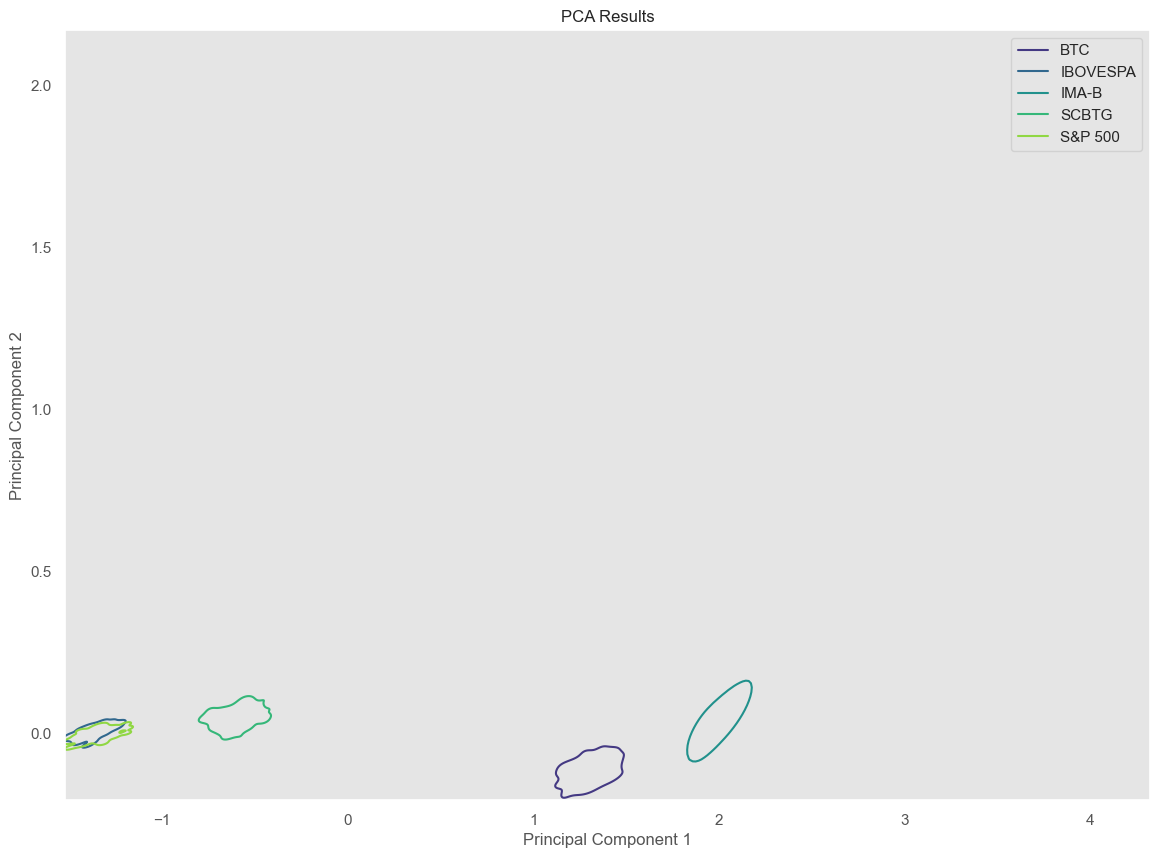

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mfn.entropy import MFN

# Assuming csv_files is a list of tuples (filename, group_name)
data = []

# Process each CSV file
for f, name in csv_files:
    reader = CryptoCsvReader(f'data/{f}')
    time_series = reader.read()
    value_dict = MFN(
        time_series,
        b=10,
        B=.1,
        size=100,
        dx=3
    )
    pe = value_dict['permutation entropy']
    fim = value_dict['fisher information']

    for p, f_i in zip(pe, fim):
        data.append({'PE': p, 'FIM': f_i, 'group': name})

# Create DataFrame from the collected data
df = pd.DataFrame(data)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['PE', 'FIM']])

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['group'] = df['group']

# Plot PCA results
plt.figure(figsize=(14, 10))

# Contour plot of PE and FIM
ax = sns.kdeplot(data=pca_df, x='PC1', y='PC2', hue='group', palette='viridis', levels=2, bw_adjust=0.8, legend=True)

legend = ax.get_legend()
legend.set_title(None)
# Scatter plot of PCA results
# sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='group', palette='viridis', alpha=0.7)

# Set axis limits
plt.xlim(pca_df['PC1'].min(), pca_df['PC1'].max())
plt.ylim(pca_df['PC2'].min(), pca_df['PC2'].max())

plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(False)
plt.show()


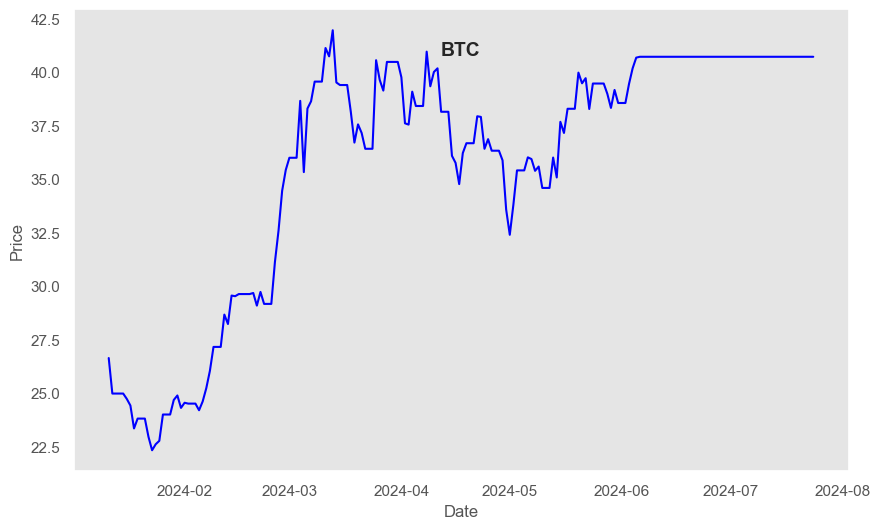

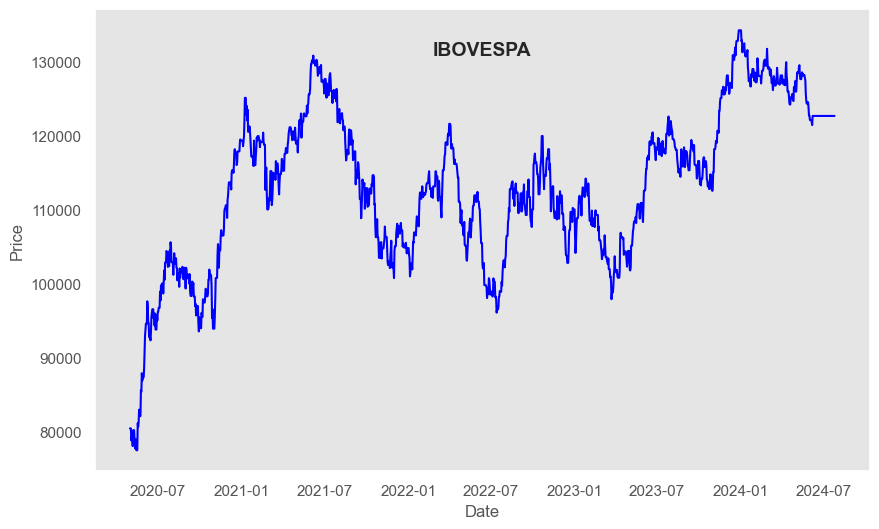

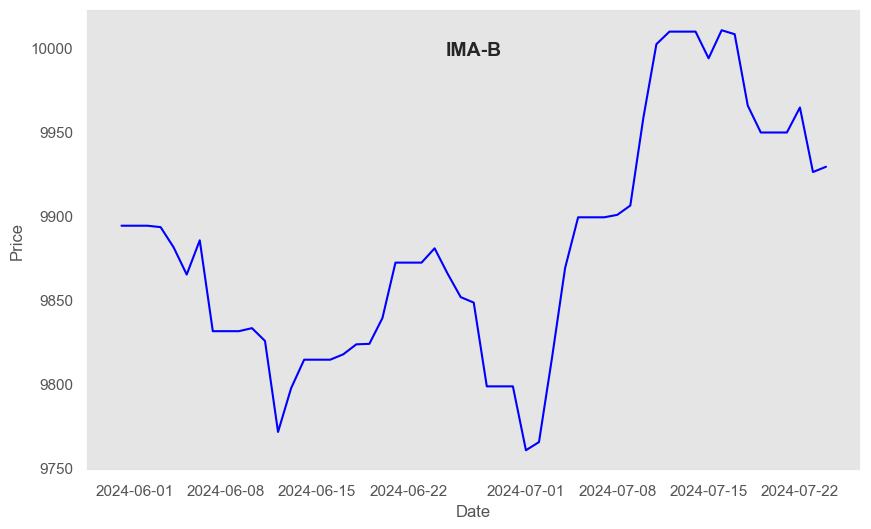

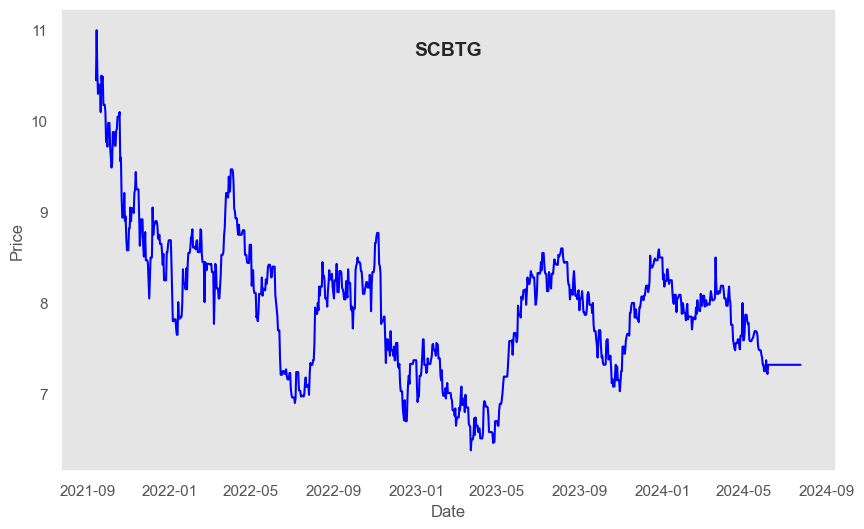

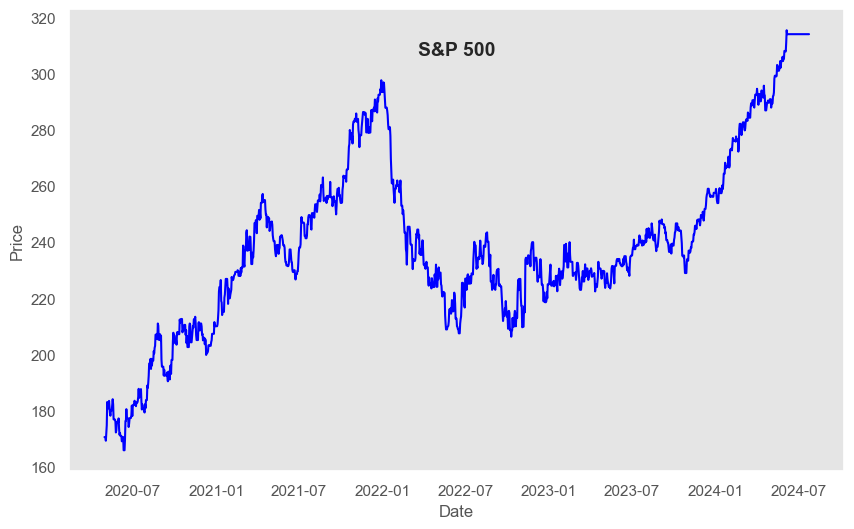

In [20]:
## Define the start and end dates
start_date = pd.to_datetime('2020-05-1')
end_date = pd.to_datetime('2024-07-24')

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

for data, name in time_series_list:
    plt.figure(figsize=(10, 6))

    # Plot the time series with the corresponding date range
    plt.plot(date_range, data, label=name, color='blue')

    # Adjust the title to be inside the plot
    plt.text(
        x=0.5,  # Horizontal position in axes coordinates (0 to 1)
        y=0.9,  # Vertical position in axes coordinates (0 to 1)
        s=f'{name}',
        fontsize=14,
        weight='bold',
        ha='center',
        transform=plt.gca().transAxes
    )

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(False)
    if name == 'EUR/USD':
        plt.savefig(f'imgs/EUR-USD_series.png')
    else:
        plt.savefig(f'imgs/{name}_series.png')
    plt.show()
 

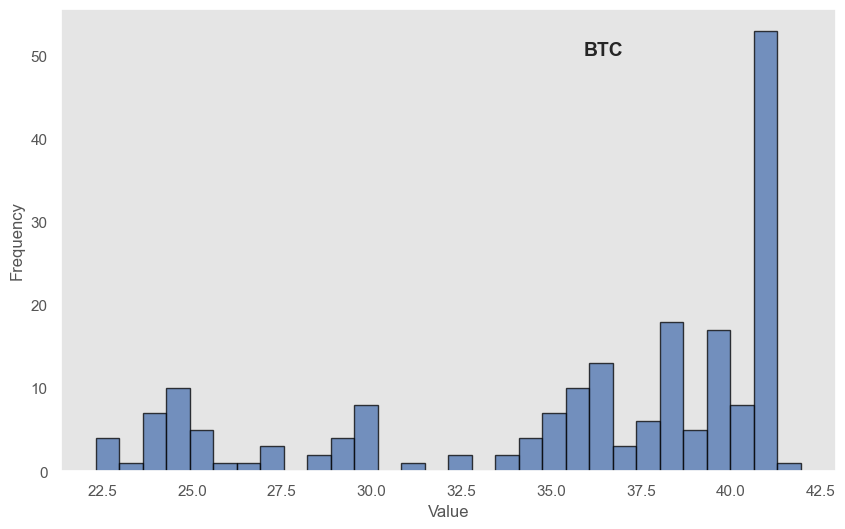

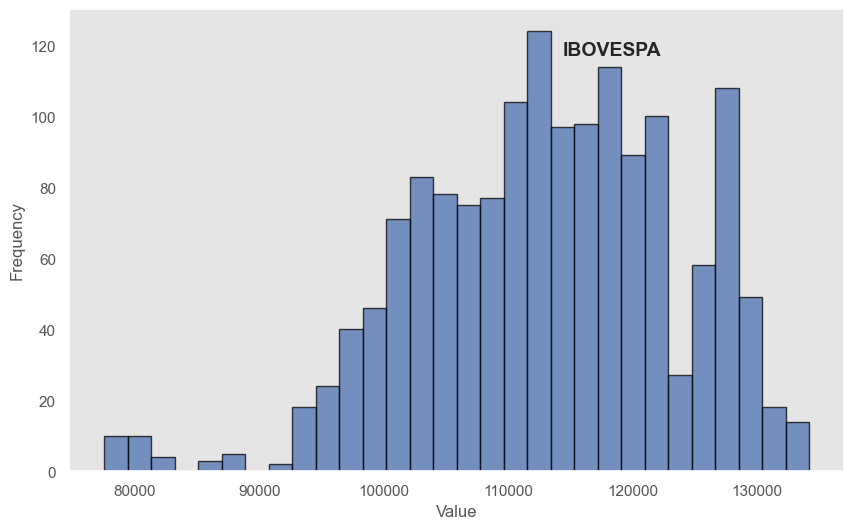

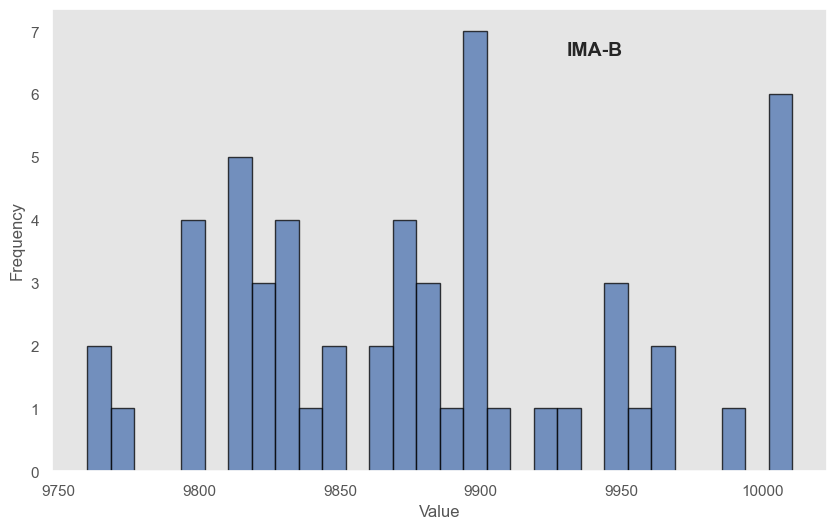

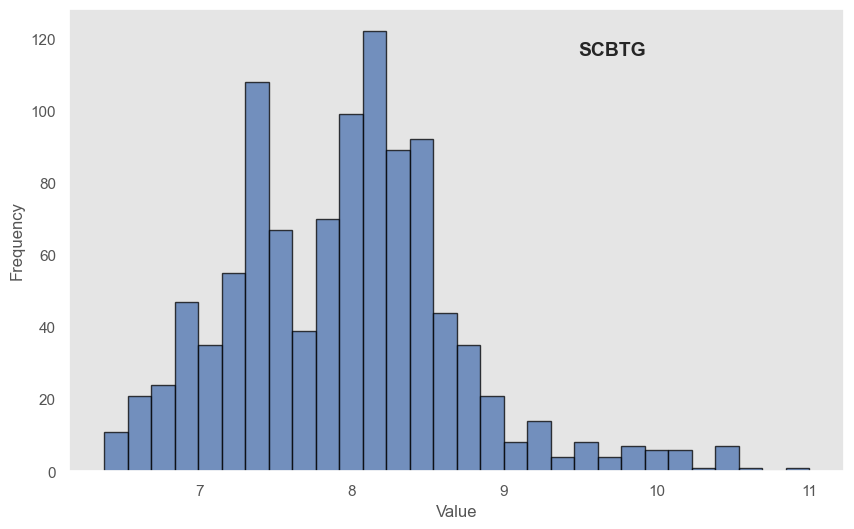

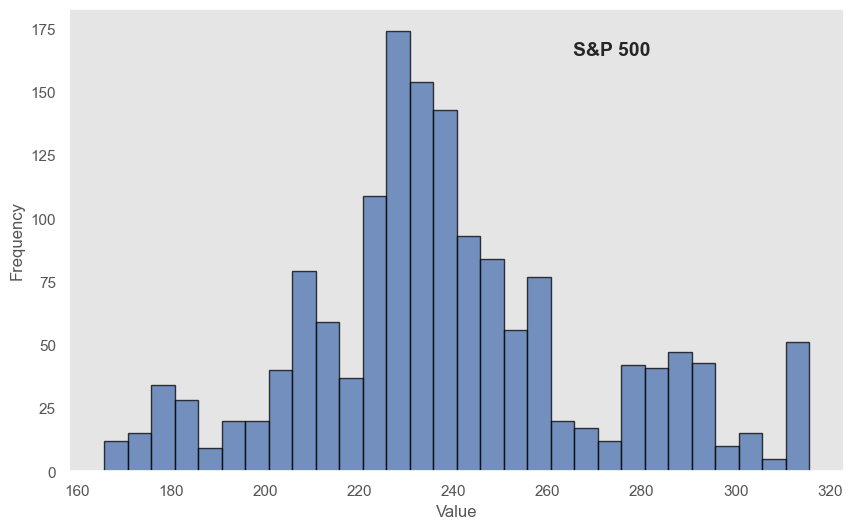

In [21]:
for data, name in time_series_list:
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, alpha=0.75, edgecolor='black')

    # Adjust the title to be inside the plot
    plt.text(
        x=0.7,  # Horizontal position in axes coordinates (0 to 1)
        y=0.9,  # Vertical position in axes coordinates (0 to 1)
        s=f'{name}',
        fontsize=14,
        weight='bold',
        ha='center',
        transform=plt.gca().transAxes
    )

    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.savefig(f'imgs/{name}_hist.png')
    plt.show()



# Plots do paper

BTC


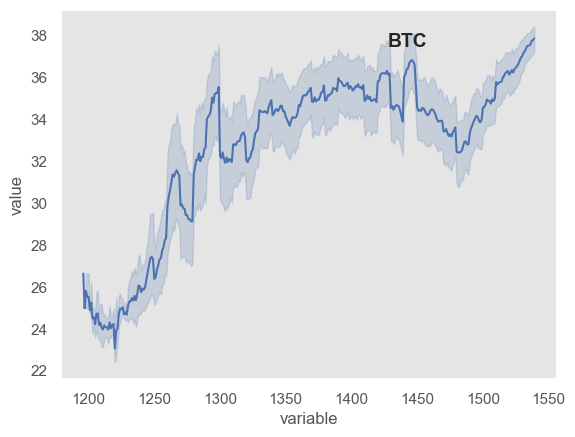

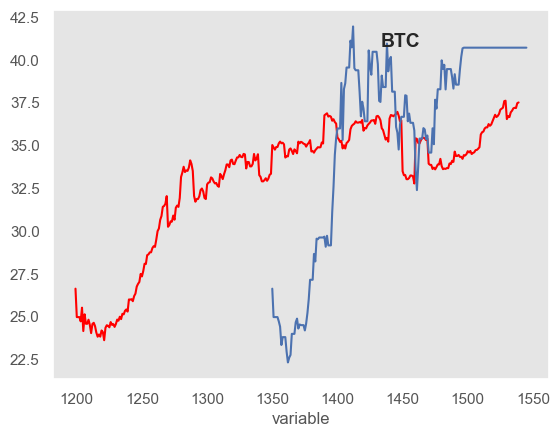

IBOVESPA


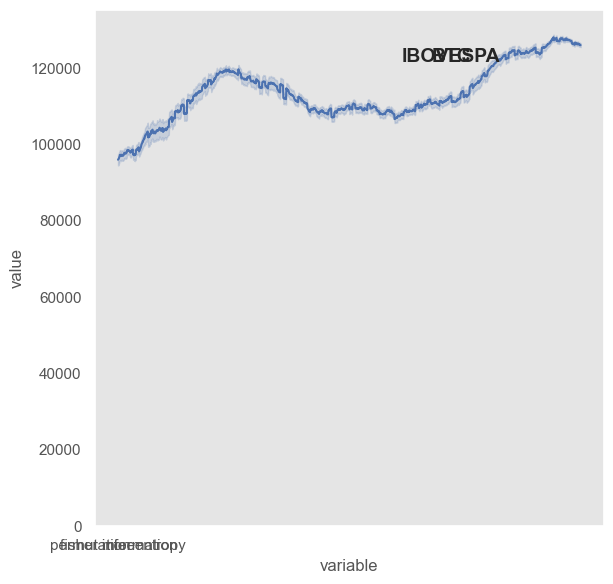

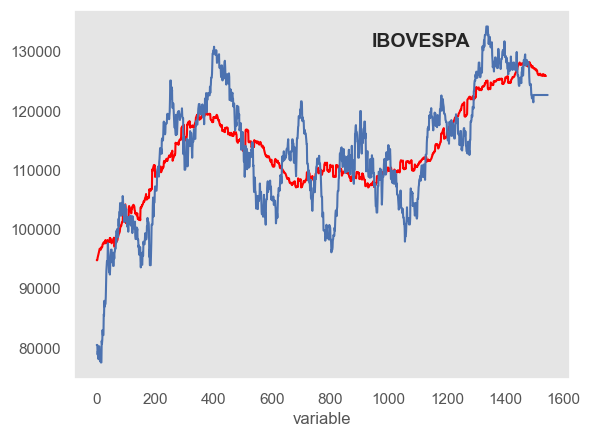

IMA-B


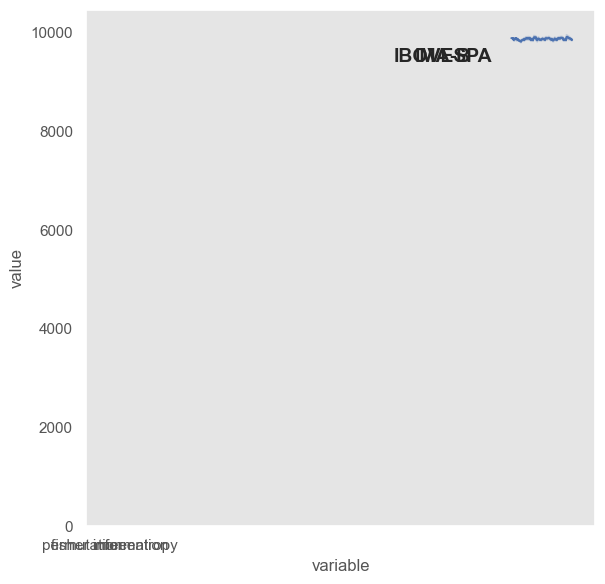

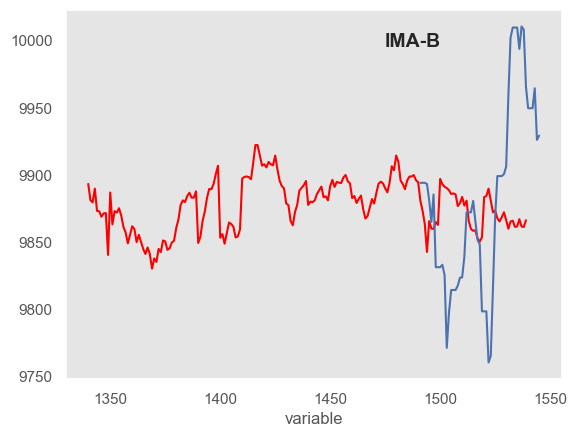

SCBTG


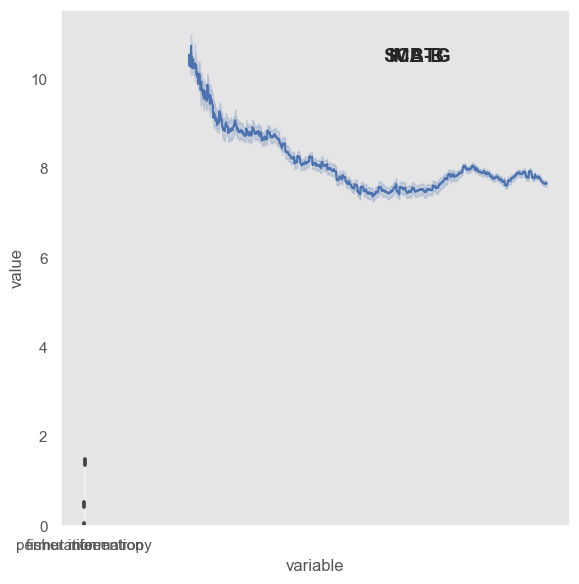

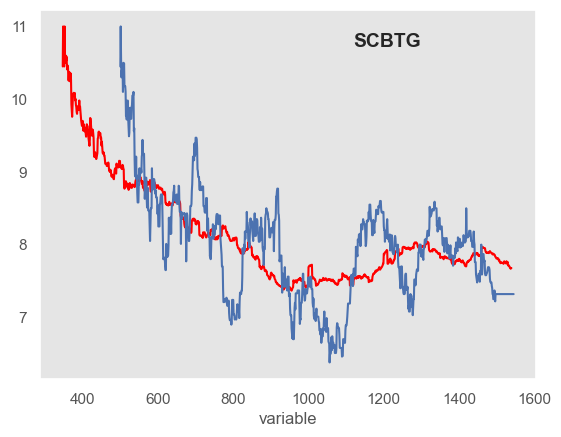

S&P 500


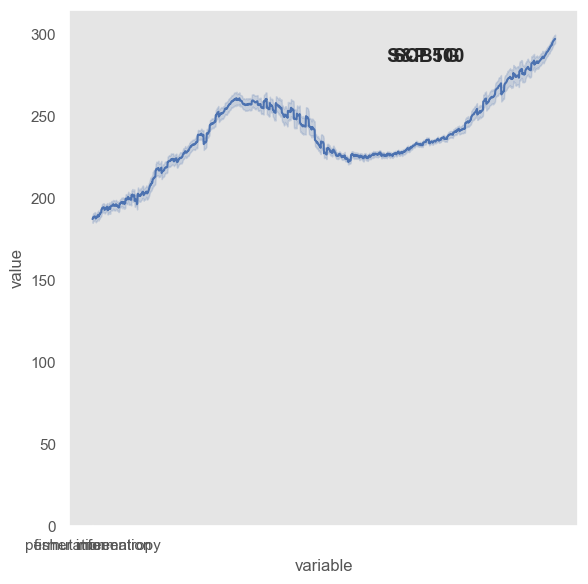

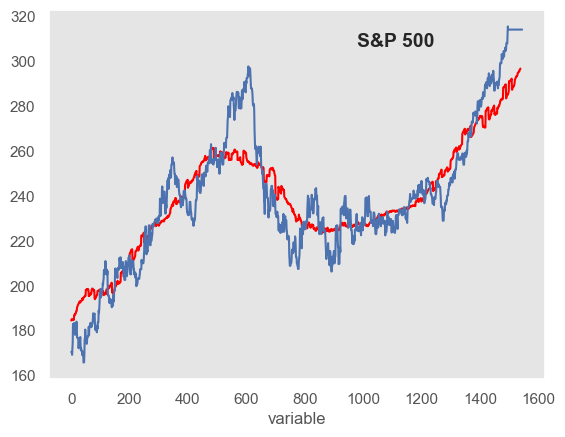

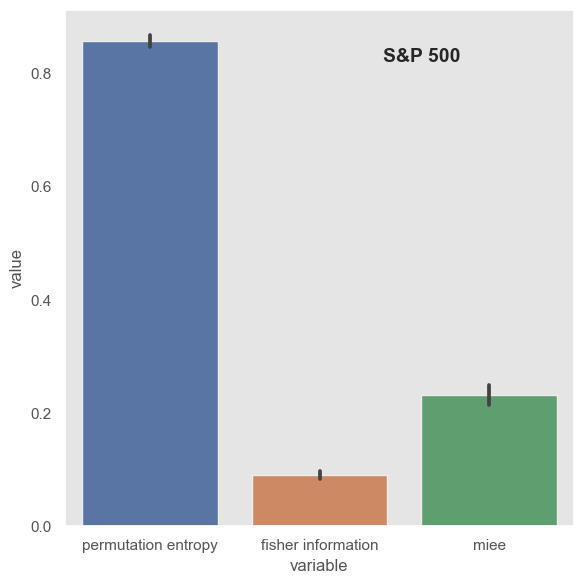

In [22]:
from scipy import stats as st
from utils.plotter import calculate_statistics

statistics = []

for path, name in csv_files:
    reader = CryptoCsvReader(f'data/{path}')
    data  = reader.read()
    plotter = Plotter(data, name)
    plotter.plot_lbb_mean_with_ci()
    plotter.plot_lbb_mean()
    mfn_res = plotter.plot_mfn()

    fim = np.mean(mfn_res['fisher information'])
    miee = np.mean(mfn_res['miee'])
    pe = np.mean(mfn_res['permutation entropy'])
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    kurtosis = st.kurtosis(data)
    skewness = st.skew(data)

    stats = pd.Series({
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Kurtosis': kurtosis,
        'Skewness': skewness,
        'Fishers Information': fim,
        'MIEE': miee,
        'Permutation Entropy': pe
    })
    stats.name = name
    statistics.append(stats)

# Convert to DataFrame
stats_df = pd.DataFrame(statistics).T

# Rename index to match desired output
stats_df.to_excel('statistics_summary.xlsx', index=True)

# Save to CSV
# stats_df.to_csv('statistics_summary.csv')



ValueError: min() arg is an empty sequence

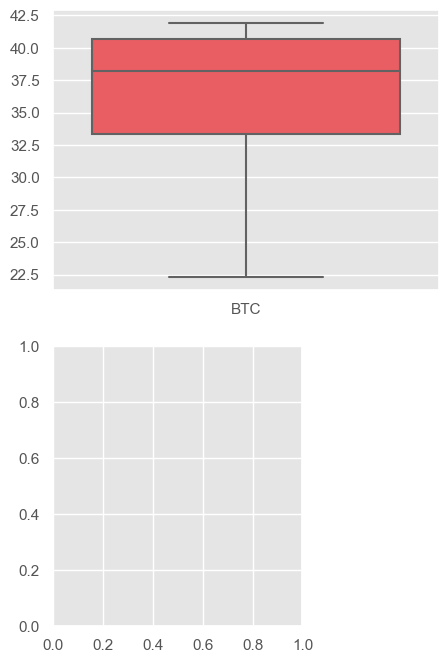

In [23]:
from matplotlib import gridspec
from matplotlib import pyplot as plt
#sns.set_style("white")
plt.style.use('ggplot')  
sns.set_context("notebook") 
sns.set_palette("deep") 
#sns.set_style("darkgrid") 
time_series_list = []
last_length = None 

for path, name in csv_files:
    reader = CryptoCsvReader(f'data/{path}')
    data = reader.read()
    
    if last_length is not None and len(data) != last_length:
        raise Exception('lenghts not match')
    
    last_length = len(data)
    
    time_series_list.append((data, name))

group_a = ["BTC"]
#group_b = ['BNB', 'ETH','SOL','XRP','EUR/USD','NYA','Gold','S&P 500']
group_b = ['ETH','NYA']
group_c = ['Gold','S&P 500']
group_d = ['BNB','SOL','XRP','EUR/USD']

time_series = [x[0] for x in time_series_list]
labels = [x[1] for x in time_series_list]

data = {
    'data': time_series,
    'label': labels  # Corresponding labels
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a new column 'group' based on the label
group_A_labels = ['BTC'] # Group A
group_B_labels = ['ETH','NYA']   # Group B
group_C_labels = ['Gold','S&P 500']   # Group C
group_D_labels = ['BNB','SOL'] # Group D
group_E_labels = ['XRP','EUR/USD'] # Group D

# Create a new column 'group' based on the label
df['group'] = df['label'].apply(
    lambda x: 'A' if x in group_A_labels else 
               ('B' if x in group_B_labels else 
                ('C' if x in group_C_labels else 
                 ('D' if x in group_D_labels else 'E')))
)

# Flatten the lists in the 'data' column
df_exploded = df.explode('data')

# Create a figure with a gridspec layout
fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 7)  # 2 rows, 2 columns


ax1 = fig.add_subplot(gs[0, 0:3])
sns.boxplot(data=df_exploded[df_exploded['group'] == 'A'], x='label', y='data', color="#FF474C", ax=ax1)
ax1.set_xlabel('')  # Remove x-axis label
ax1.set_ylabel('')  # Remove y-axis label
ax1.set_xticklabels(["BTC"])  # Remove x-axis tick labels
#ax1.set_yticklabels([])  # Remove y-axis tick labels
#ax1.set_xticks([])  # Remove x-axis tick marks
#ax1.set_yticks([])  # Remove y-axis tick marks

ax2 = fig.add_subplot(gs[1, 0:2])
sns.boxplot(data=df_exploded[df_exploded['group'] == 'B'], x='label', y='data', palette=["#FF474C","lightblue"], ax=ax2)
ax2.set_xlabel('')  # Remove x-axis label
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_xticklabels(group_B_labels)  # Remove x-axis tick labels
# ax2.set_yticklabels([])  # Remove y-axis tick labels
# ax2.set_xticks([])  # Remove x-axis tick marks
# ax2.set_yticks([])  # Remove y-axis tick marks

ax3 = fig.add_subplot(gs[0, 3:6])
sns.boxplot(data=df_exploded[df_exploded['group'] == 'C'], x='label', y='data', palette=["lightgreen","lightblue"], ax=ax3)
ax3.set_xlabel('')  # Remove x-axis label
ax3.set_ylabel('')  # Remove y-axis label
ax3.set_xticklabels(group_C_labels)  # Remove x-axis tick labels
# ax3.set_yticklabels([])  # Remove y-axis tick labels
# ax3.set_xticks([])  # Remove x-axis tick marks
# ax3.set_yticks([])  # Remove y-axis tick marks

ax4 = fig.add_subplot(gs[1, 2:4])
sns.boxplot(data=df_exploded[df_exploded['group'] == 'D'], x='label', y='data', color="#FF474C", ax=ax4)
ax4.set_xlabel('')  # Remove x-axis label
ax4.set_ylabel('')  # Remove y-axis label
ax4.set_xticklabels(group_D_labels)  # Remove x-axis tick labels
# ax4.set_yticklabels([])  # Remove y-axis tick labels
# ax4.set_xticks([])  # Remove x-axis tick marks
# ax4.set_yticks([])  # Remove y-axis tick marks

ax5 = fig.add_subplot(gs[1, 4:6])
sns.boxplot(data=df_exploded[df_exploded['group'] == 'E'], x='label', y='data', palette=["#FF474C","#DDA0DD"], ax=ax5)
ax5.set_xlabel('')  # Remove x-axis label
ax5.set_ylabel('')  # Remove y-axis label
ax5.set_xticklabels(group_E_labels)  # Remove x-axis tick labels
# ax5.set_yticklabels([])  # Remove y-axis tick labels
# ax5.set_xticks([])  # Remove x-axis tick marks
# ax5.set_yticks([])  # Remove y-axis tick marks

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.9)
fig.supylabel("Closing Prices in $", x=0.05)
plt.savefig("imgs/boxplot.png", bbox_inches='tight', pad_inches=0.1)
# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib import pyplot as plt

time_series_list = []
last_length = None 

for path, name in csv_files:
    reader = CryptoCsvReader(f'data/{path}')
    data = reader.read()
    
    if last_length is not None and len(data) != last_length:
        raise Exception('lenghts not match')
    
    last_length = len(data)
    
    time_series_list.append((data, name))

time_series = [x[0] for x in time_series_list]
labels = [x[1] for x in time_series_list]

#Plots a single figure but the scale for the plots isnt the best
plt.figure(figsize=(10, 6))
sns.boxplot(data=time_series)

plt.xticks(range(len(labels)), labels)  # Set x-axis labels
plt.title('Boxplot of Time Series Data')
plt.xlabel('Asset')
plt.ylabel('Price')
plt.savefig('imgs/boxplot.png')
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.patches import Circle
import matplotlib.pyplot as plt
import seaborn as sns
from mfn.entropy import MFN

data = []

# Assuming df is already defined as per your code
for f, name in csv_files:
    reader = CryptoCsvReader(f'data/{f}')
    time_series = reader.read()
    value_dict = MFN(
        time_series,
        b=10,
        B=.1,
        size=100,
        dx=3
    )
    pe = value_dict['permutation entropy']
    fim = value_dict['fisher information']

    for p, f_i in zip(pe, fim):
        data.append({'PE': p, 'FIM': f_i, 'group': name})
        
df = pd.DataFrame(data)

plt.figure(figsize=(14, 10))

# Density contours with adjusted bandwidth
ax = sns.kdeplot(data=df, x='PE', y='FIM', hue='group', color='k', levels=2, bw_adjust=0.8, legend=True)

legend = ax.get_legend()
legend.set_title(None)
# Points with increased size
# sns.scatterplot(data=df, x='PE', y='FIM', hue='group', palette='viridis', alpha=0.7)

# Set axis limits to zoom in (adjust these limits as needed)
plt.xlim(df['PE'].min(), df['PE'].max())
plt.ylim(df['FIM'].min(), df['FIM'].max())

# Highlighting and labeling the ideal circular region
ideal_center_x = df['PE'].quantile(0.75)
ideal_center_y = df['FIM'].quantile(0.25)
radius = 0.1 * (df['PE'].max() - df['PE'].min())  # Adjust radius size as needed

circle = Circle(
    (ideal_center_x, ideal_center_y),
    radius,
    linewidth=2,
    edgecolor='red',
    facecolor='none',
    linestyle='--'
)
ax.add_patch(circle)

# Adding the label
plt.text(
    ideal_center_x,
    ideal_center_y + radius * 0.1,
    'Ideal Region',
    color='red',
    fontsize=12,
    ha='center'
)

plt.title('Zoomed Plot with Density Contours and Group Means')
plt.xlabel('Permutation Entropy (PE)')
plt.ylabel('Fisher Information (FIM)')
# plt.legend(title='asset')
plt.grid(False)
plt.savefig(f'imgs/contours_mfn.png')
plt.show()


# PCA

In [ ]:
import matplotlib #import patches
from mfn.entropy import MFN
from math import sqrt
from adjustText import adjust_text
#matplotlib.use("WebAgg")
means = []

for f, name in csv_files:
    reader = CryptoCsvReader(f'data/{f}')
    time_series = reader.read()
    value_dict = MFN(
        time_series,
        b=10,
        B=.1,
        size=100,
        dx=3
    )
    pe = np.mean(value_dict['permutation entropy'])
    fim = np.mean(value_dict['fisher information'])
    p = (pe, fim)
    means.append((p, name))
    
x = [point[0] for point, _ in means]  # Permutation Entropy
y = [point[1] for point, _ in means]  # Fisher Information Measure
labels = [name for _, name in means]  # Labels

# Plotting the points
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.6)

#BEGIN IDEAL REGION
plt.xlim(0.857, 1.001)
plt.ylim(0, 0.095)
mean = 0.5   # Mean of the normal distribution
std_dev = 0.5  # Standard deviation of the normal distribution
# Define the interval
low_pe = 0.99
high_pe = 1
low_fim = 0   
high_fim = 0.01
# Generate random floats from the normal distribution
random_floats = np.random.normal(loc=mean, scale=std_dev, size=10000)
# Truncate the random floats to the desired interval
rf_pe = random_floats[(random_floats >= low_pe) & (random_floats <= high_pe)]
rf_fim = random_floats[(random_floats >= low_fim) & (random_floats <= high_fim)]
plt.scatter(rf_pe[:7], rf_fim[:7], color='red')
#print(f"{rf_fim[:10]} and {rf_pe[:10]}") # check if size is the same
#Highlighting and labeling the ideal circular region
# Ensure the aspect ratio is equal to maintain the shape of the circle
# Set labels and title
# Show the plot
# circle = Circle(
#     (0.92, 0.02),
#     linewidth=10,
#     edgecolor='red',
#     fill=True,
#     facecolor='none'#,
#     #linestyle='--'
# )

# # Adding the label
# plt.text(
#     ideal_center_x,
#     ideal_center_y + radius * 0.1,
#     'Ideal Region',
#     color='red',
#     fontsize=12,
#     ha='center'
# )
#END OF IDEAL REGION

# Adding labels to the points
texts = []
for i, label in enumerate(labels):
    text = plt.text(x[i], y[i], label,bbox=dict(facecolor='white', alpha=0.5), fontsize=11, ha='center')
    texts.append(text)

# Adjust the text positions to avoid overlaps
adjust_text(texts, force_text=(0.5,0.5), expand=(1.7,1.3), force_explode=(0.01,0.02))

ideal_center_x = rf_pe[:7].mean()
ideal_center_y = rf_fim[:7].mean()
radius = 0.1 * (rf_pe[:7].max() - rf_fim[:7].min())  # Adjust radius size as needed
print(f"{ideal_center_x}\n{ideal_center_y}")

# Setting the axis labels and title
plt.xlabel('Permutation Entropy')
plt.ylabel('Fisher Information Measure')
#plt.title('Permutation Entropy vs. Fisher Information Measure')
plt.grid(False)
plt.savefig(f'imgs/means_mfn.png')
plt.show()

#Gerando Distância dos ativos .csv
dist = []
for index, (v1, v2, v3) in enumerate(zip(x, y, labels)):
    distance = sqrt(((1-v1)**2) + ((v2)**2)) # como é zero não coloquei(0-v2)
    label = v3
    dist.append((distance, label))

data = list(dist)
df = pd.DataFrame(data, columns=["Distance from (1,0)", "Asset name"])
df.to_csv('dist_asset.csv', index=False)
print(f"{df}\n{x[0]}\n{y[0]}\n{labels[0]}")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mfn.entropy import MFN

# Assuming csv_files is a list of tuples (filename, group_name)
data = []

# Process each CSV file
for f, name in csv_files:
    reader = CryptoCsvReader(f'data/{f}')
    time_series = reader.read()
    value_dict = MFN(
        time_series,
        b=10,
        B=.1,
        size=100,
        dx=3
    )
    pe = value_dict['permutation entropy']
    fim = value_dict['fisher information']

    for p, f_i in zip(pe, fim):
        data.append({'PE': p, 'FIM': f_i, 'group': name})

# Create DataFrame from the collected data
df = pd.DataFrame(data)

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['PE', 'FIM']])

# Apply PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a new DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['group'] = df['group']

# Compute the mean PC1 and PC2 for each group
mean_pca_df = pca_df.groupby('group').mean().reset_index()

# Plot the means
plt.figure(figsize=(10, 6))
plt.scatter(mean_pca_df['PC1'], mean_pca_df['PC2'], color='blue', alpha=0.6)
# Adding labels to the points
texts = []
for i, label in enumerate(mean_pca_df['group']):
    text = plt.text(mean_pca_df['PC1'][i], mean_pca_df['PC2'][i], label,bbox=dict(facecolor="white", alpha=0.5), fontsize=11, ha='center')
    texts.append(text)
adjust_text(texts, force_text=(0.5,0.5), expand=(1.2,1.3), force_explode=(0.001,0.002), expand_axes=True,min_arrow_len=7)
# Compute magnitudes of the PCA components
magnitudes = np.linalg.norm(pca.components_, axis=1)

for i, (pc1, pc2) in enumerate(pca.components_): # .annotate() doesn't mess with the scaling
    color = ['green', 'red'][i]
    plt.annotate('PE' if i == 0 else 'FIM', xy=(0, 0), xytext=(pc1/magnitudes[i] * 0.066, pc2/magnitudes[i] * 0.066),
             arrowprops=dict(facecolor=color, edgecolor=color, arrowstyle='<-', linewidth=4.5),
                fontsize = 12)
    #plt.arrow(0, 0, pc1 / magnitudes[i] * 0.005, pc2 / magnitudes[i] * 0.005, color=color, head_length=0.08, head_width=0.08)
    #plt.text(pc1*0.1 , pc2*0.1, 'PE' if i == 0 else 'FIM', color='black', fontsize=10)

print(pc1)
print(pc2)
print(pc1/magnitudes[0])
# Setting the axis labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.title('Mean PCA Results by Group')
plt.grid(False)
plt.savefig('imgs/pca_means.png')
plt.show()


# Code Examples

In [ ]:
from matplotlib import pyplot as plt

time_series_list = []
last_length = None 

for path, name in csv_files:
    reader = CryptoCsvReader(f'data/{path}')
    data = reader.read()
    
    if last_length is not None and len(data) != last_length:
        raise Exception('lenghts not match')
    
    last_length = len(data)
    
    time_series_list.append((data, name))

group_a = ["BTC"]
#group_b = ['BNB', 'ETH','SOL','XRP','EUR/USD','NYA','Gold','S&P 500']
group_b = ['ETH','NYA']
group_c = ['Gold','S&P 500']
group_d = ['BNB','SOL','XRP','EUR/USD']

time_series = [x[0] for x in time_series_list]
labels = [x[1] for x in time_series_list]

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 1 column

# First subplot: only one boxplot
axs[0,0].boxplot(time_series[0])
axs[0,0].set_title('Boxplot 1')
axs[0,0].set_ylabel('Values')
axs[0,0].set_xticklabels(group_a)

# Second subplot: two boxplots
axs[1,1].boxplot([time_series[1], time_series[3], time_series[4], time_series[5]])
axs[1,1].set_title('Boxplots 2 and 3')
axs[1,1].set_ylabel('Values')
axs[1,1].set_xticklabels(group_d)

axs[0,1].boxplot([time_series[2], time_series[6]])
axs[0,1].set_title('Boxplots 2 and 3')
axs[0,1].set_ylabel('Values')
axs[0,1].set_xticklabels(group_b)

axs[1,0].boxplot([time_series[7], time_series[8]])
axs[1,0].set_title('Boxplots 2 and 3')
axs[1,0].set_ylabel('Values')
axs[1,0].set_xticklabels(group_c)

plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
nested_array = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Create a figure with subplots
fig, axs = plt.subplots(1, len(nested_array), figsize=(12, 6))

# Plot each nested array as a boxplot
for i, ax in enumerate(axs):
    ax.boxplot(nested_array[i])
    ax.set_title(f'Boxplot {i+1}')

# Set common labels
plt.suptitle('Boxplots for Nested Arrays')
plt.xlabel('Values')
plt.ylabel('Arrays')
axs[0].set_xlabel("cool")
# Adjust spacing and show the plot
plt.subplots_adjust(wspace=0.5)
plt.show()

In [ ]:
nested_list = [[1, 2, 3], [8, 9, 1, 3], [4, 5, 6, 1]]

# Convert nested list to a DataFrame
df = pd.DataFrame({'Group': ['Group 1'] * len(nested_list[0]) + 
                   ['Group 2'] * len(nested_list[1]) + 
                   ['Group 3'] * len(nested_list[2]),
                   'Values': nested_list[0] + nested_list[1] + nested_list[2]})

# Create a box plot
sns.boxplot(x='Group', y='Values', data=df)

# Add titles
plt.title('Box Plot from Nested Lists')

# Show the plot
plt.show()

print(df)

In [ ]:
nested_list = [[1, 2, 3], [8, 9, 1, 3], [4, 5, 6, 1]]

# Create a box plot
plt.boxplot(nested_list)

# Set the x-tick labels
plt.xticks([1, 2, 3], ['Group 1', 'Group 2', 'Group 3'])

# Add titles and labels
plt.title('Box Plot from Nested Lists')
plt.xlabel('Groups')
plt.ylabel('Values')

# Show the plot
plt.show()


In [ ]:
data = {
    'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'points': [19, 12, 15, 14, 19, 23, 25, 29],
    'assists': [13, 15, 11, 8, 6, 8, 11, 14],
    'rebounds': [11, 7, 8, 12, 13, 7, 6, 8],
    'blocks': [1, 2, 2, 3, 5, 4, 3, 3]
}
df = pd.DataFrame(data)

# Step 2: Define the subplot layout (2 rows, 2 columns)
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# # Step 3: Create boxplots in each subplot
# sns.boxplot(data=df, x='team', y='points', ax=axes[0, 0])
# axes[0, 0].set_title('Points by Team')

# sns.boxplot(data=df, x='team', y='assists', ax=axes[0, 1])
# axes[0, 1].set_title('Assists by Team')

# sns.boxplot(data=df, x='team', y='rebounds', ax=axes[1, 0])
# axes[1, 0].set_title('Rebounds by Team')

# sns.boxplot(data=df, x='team', y='blocks', ax=axes[1, 1])
# axes[1, 1].set_title('Blocks by Team')

# # Step 4: Adjust layout and show the plot
# plt.tight_layout()
# plt.show()
print(df)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Creating a synthetic dataset
data = {
    'Feature1': [2.5, 2.4, 3.5, 3.6, 4.2],
    'Feature2': [2.4, 2.3, 3.2, 3.5, 4.0]
}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

# Standardizing the data
scaler = StandardScaler()
X_std = scaler.fit_transform(df)

# Calculating the covariance matrix
cov_matrix = np.cov(X_std.T)
print("\nCovariance Matrix:")
print(cov_matrix)

# Calculating eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Sorting eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Selecting the top 2 eigenvectors
W = sorted_eigenvectors[:, :2]
print("\nSelected Eigenvectors (Principal Components):")
print(W)

# Projecting the data
X_pca = X_std.dot(W)
print("\nProjected Data (PCA Result):")
print(X_pca)

# Plotting the original data and PCA vectors
plt.figure(figsize=(12, 5))

# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(df['Feature1'], df['Feature2'], color='blue')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot PCA vectors
arrow_scale = 2
plt.arrow(0, 0, arrow_scale * W[0, 0], arrow_scale * W[1, 0], color='red', head_width=0.1, head_length=0.1)
plt.arrow(0, 0, arrow_scale * W[0, 1], arrow_scale * W[1, 1], color='green', head_width=0.1, head_length=0.1)
plt.text(arrow_scale * W[0, 0] * 1.15, arrow_scale * W[1, 0] * 1.15, 'PC1', color='red', fontsize=12)
plt.text(arrow_scale * W[0, 1] * 1.15, arrow_scale * W[1, 1] * 1.15, 'PC2', color='green', fontsize=12)
plt.grid()

# PCA-transformed data plot
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='red')
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
mean = 0.5   # Mean of the normal distribution
std_dev = 0.5  # Standard deviation of the normal distribution
# Define the interval
low_pe = 0.8   # Lower bound of the interval
high_pe = 1
low_fim = 0   # Lower bound of the interval
high_fim = 0.2
# Generate random floats from the normal distribution
random_floats = np.random.normal(loc=mean, scale=std_dev, size=1000)
# Truncate the random floats to the desired interval
rf_pe = random_floats[(random_floats >= low_pe) & (random_floats <= high_pe)]
rf_fim = random_floats[(random_floats >= low_fim) & (random_floats <= high_fim)]
print(f" a {rf_pe[:10]} and then {rf_fim[:10]}")

plt.scatter(rf_pe[:10], rf_fim[:10], color='red')
